In [33]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
year = input('Year')

Year 2024


In [3]:
month = input('Month')

Month 01


In [4]:
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_'+year+'-'+month+'.parquet'

In [5]:
url

'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet'

In [6]:
df = pd.read_parquet(url)

In [7]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [8]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

In [9]:
df.trip_time = None

In [10]:
df.trip_time= df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [26]:
df.trip_time = df.trip_time.dt.total_seconds()/60

In [32]:
df.trip_time.describe()

count    2.964624e+06
mean     1.561295e+01
std      3.485105e+01
min     -1.356667e+01
25%      7.150000e+00
50%      1.163333e+01
75%      1.868333e+01
max      9.455400e+03
dtype: float64

In [12]:
df.trip_distance

0          1.72
1          1.80
2          4.70
3          1.40
4          0.80
           ... 
2964619    3.18
2964620    4.00
2964621    3.33
2964622    3.06
2964623    8.10
Name: trip_distance, Length: 2964624, dtype: float64

In [14]:
df.trip_speed = None

In [27]:
df.trip_speed = df.trip_distance / df.trip_time

In [28]:
df.trip_speed

0          0.086869
1          0.272727
2          0.262326
3          0.168675
4          0.131148
             ...   
2964619    0.369052
2964620    0.271186
2964621    0.175263
2964622    0.171429
2964623    0.537017
Length: 2964624, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x765f03b32e50>,
 'caps': [<matplotlib.lines.Line2D at 0x765f03bbe590>,
 'boxes': [<matplotlib.lines.Line2D at 0x765f03bbfbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x765f035830d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x765f03583450>],
 'means': []}

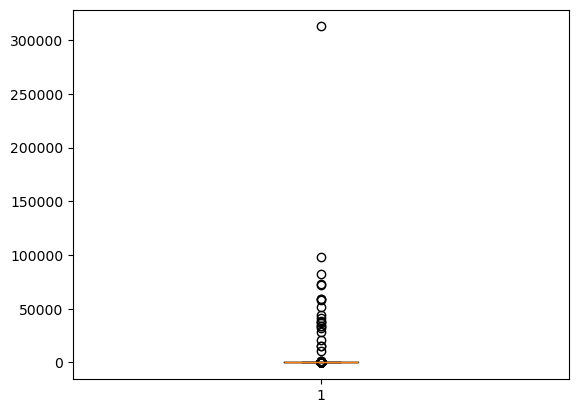

In [36]:
plt.boxplot(df.trip_distance)